In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Using K-Means Clusturing Algorithm**

In [64]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range (X.shape[0]):
        distance=[]
        for j in range (centroids.shape[0]):
            norm_ij=np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i]=np.argmin(distance)
    return idx

In [65]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points=X[idx==k]
        centroids[k]=np.mean(points,axis=0)
    return centroids

In [66]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [67]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

**Using Algorithm to Compress**

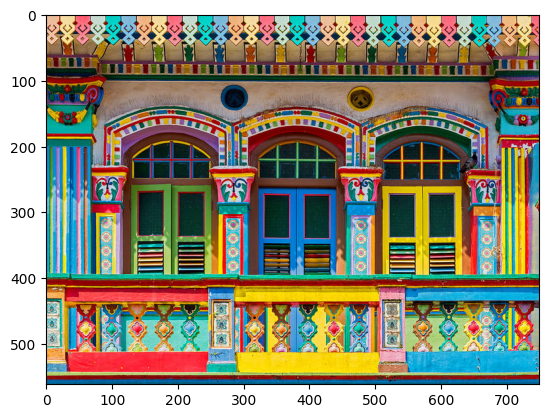

In [68]:
image=plt.imread('image.jpg')
image=image/255
plt.imshow(image)

In [69]:
transformed_image=np.reshape(image,(image.shape[0]*image.shape[1],3))

In [76]:
K = 4
max_iters = 1
initial_centroids = kMeans_init_centroids(transformed_image, K)
centroids, idx = run_kMeans(transformed_image, initial_centroids, max_iters)

K-Means iteration 0/0


<Figure size 800x600 with 0 Axes>

In [77]:
idx = find_closest_centroids(transformed_image, centroids) #finding closest centroid
X_recovered = centroids[idx, :] #replacing all the pixels with the colour of closest centroid
X_recovered = np.reshape(X_recovered, image.shape) #reshaping

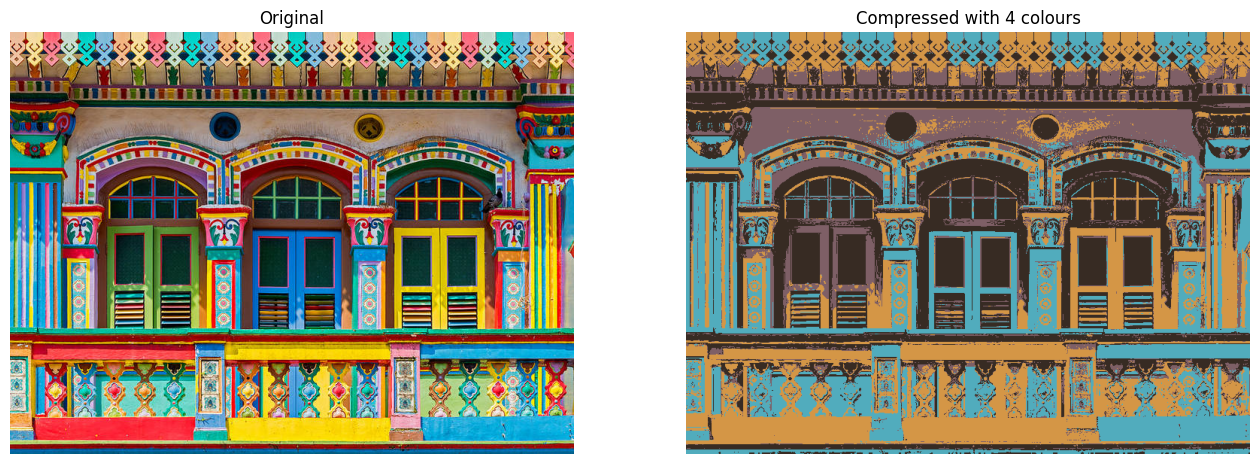

In [78]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

# Display original image
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()